<a href="https://colab.research.google.com/github/rajivsresearch/Corona/blob/master/India_Corona_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas

     |████████████████████████████████| 931kB 2.8MB/s 
     |████████████████████████████████| 14.7MB 307kB/s 
     |████████████████████████████████| 10.4MB 55.0MB/s 


In [0]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
shapefile1 = 'drive/My Drive/Data/India Map/Indian_States.shp'

In [0]:
gdf = gpd.read_file(shapefile1)

Text(81, 15, 'Andhra Pradesh')

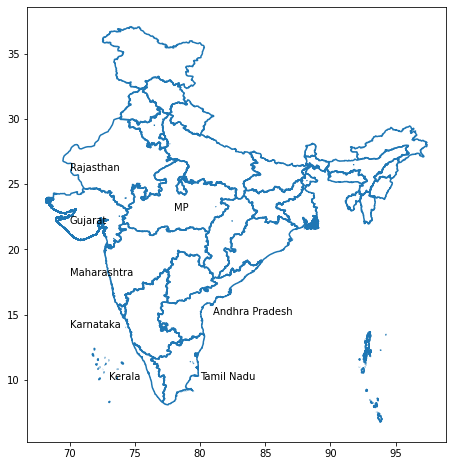

In [15]:
gdf.boundary.plot(figsize=(12,8))
plt.annotate('Kerala', (73,10))
plt.annotate('Tamil Nadu', (80,10))
plt.annotate('Karnataka', (70,14))
plt.annotate('Maharashtra', (70,18))
plt.annotate('Gujarat', (70,22))
plt.annotate('Rajasthan', (70,26))
plt.annotate('MP', (78,23))
plt.annotate('Andhra Pradesh', (81,15))